In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Question 1



Display data

In [2]:
# read data
p1_generate = pd.read_csv('./data/Plant_1_Generation_Data.csv')
p1_weather = pd.read_csv('./data/Plant_1_Weather_Sensor_Data.csv')

print(p1_generate.head())
print(p1_weather.head())

          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  
             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135

merge data

In [3]:
p1_generate['DATE_TIME'] = pd.to_datetime(p1_generate['DATE_TIME'], format='mixed', dayfirst=True)
p1_weather['DATE_TIME'] = pd.to_datetime(p1_weather['DATE_TIME'], format='mixed', dayfirst=True)
plant1_data = pd.merge(p1_generate, p1_weather, on='DATE_TIME')
print(plant1_data.head())

   DATE_TIME  PLANT_ID_x     SOURCE_KEY_x  DC_POWER  AC_POWER  DAILY_YIELD  \
0 2020-05-15     4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1 2020-05-15     4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2 2020-05-15     4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3 2020-05-15     4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4 2020-05-15     4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   TOTAL_YIELD  PLANT_ID_y     SOURCE_KEY_y  AMBIENT_TEMPERATURE  \
0    6259559.0     4135001  HmiyD2TTLFNqkNe            25.184316   
1    6183645.0     4135001  HmiyD2TTLFNqkNe            25.184316   
2    6987759.0     4135001  HmiyD2TTLFNqkNe            25.184316   
3    7602960.0     4135001  HmiyD2TTLFNqkNe            25.184316   
4    7158964.0     4135001  HmiyD2TTLFNqkNe            25.184316   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.857507          0.0  
2          

# Linear Regression Model with R^2 and MSE

In [4]:
def create_features(df):
   
    df['HOUR'] = df['DATE_TIME'].dt.hour
    df['MINUTE'] = df['DATE_TIME'].dt.minute
    
    df['DATE'] = df['DATE_TIME'].dt.date
    df['TIME'] = df['DATE_TIME'].dt.time
    df['TOTAL_MINUTES_PASS'] = df['MINUTE'] + df['HOUR'] * 60
    return df

#load data and merge data
p1_generate = pd.read_csv('./data/Plant_1_Generation_Data.csv')
p1_weather = pd.read_csv('./data/Plant_1_Weather_Sensor_Data.csv')
p1_generate['DATE_TIME'] = pd.to_datetime(p1_generate['DATE_TIME'], format='mixed', dayfirst=True)
p1_weather['DATE_TIME'] = pd.to_datetime(p1_weather['DATE_TIME'], format='mixed', dayfirst=True)
plant1_data = pd.merge(p1_generate, p1_weather, on='DATE_TIME')
plant1_data = create_features(plant1_data)
# year # hour min可能有用
features = ['HOUR', 'MINUTE', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
target = 'AC_POWER'

X_train, X_test, y_train, y_test = train_test_split(plant1_data[features], plant1_data[target], test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training Mean Squared Error: {train_mse:.2f}')
print(f'Training R^2 Score: {train_r2:.2f}')
print(f'Testing Mean Squared Error: {test_mse:.2f}')
print(f'Testing R^2 Score: {test_r2:.2f}')

Training Mean Squared Error: 3317.98
Training R^2 Score: 0.98
Testing Mean Squared Error: 3081.51
Testing R^2 Score: 0.98


# Plot Actual Value VS Predicted Value

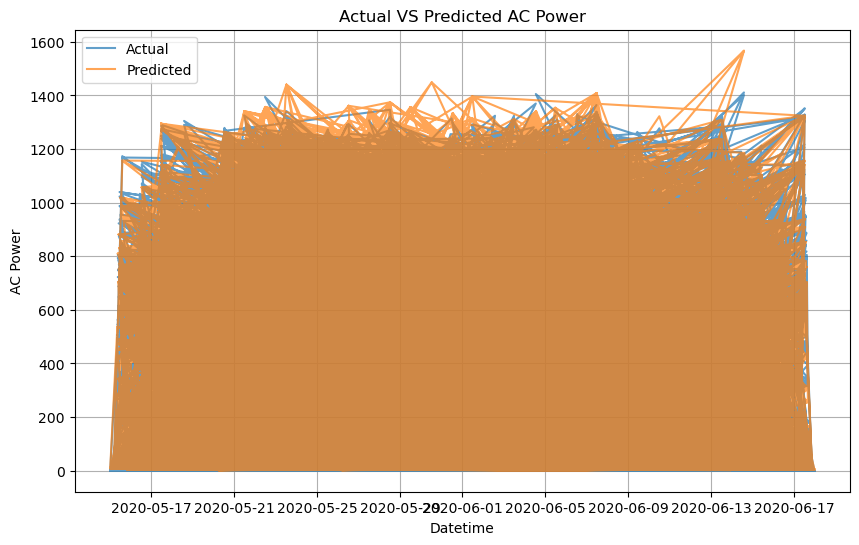

In [5]:
# find the date time base on index
X_test['DATE_TIME'] = plant1_data.loc[X_test.index, 'DATE_TIME']

# plot ac power based on test value and predict value
# I think test value should be used as the actual value as measure
plt.figure(figsize=(10, 6))
plt.plot(X_test['DATE_TIME'], y_test.values, label='Actual', alpha=0.7)
plt.plot(X_test['DATE_TIME'], y_test_pred, label='Predicted', alpha=0.7)
plt.title('Actual VS Predicted AC Power')
plt.xlabel('Datetime')
plt.ylabel('AC Power')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/vq/b4771lhd7szfxw67rsm92kk40000gn/T/ipykernel_30055/1921844965.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_data['TIME'] = pd.to_datetime(date_data['DATE_TIME'].dt.time.astype(str), format='%H:%M:%S')
/var/folders/vq/b4771lhd7szfxw67rsm92kk40000gn/T/ipykernel_30055/1921844965.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  date_data['TIME'] = pd.to_datetime(date_data['DATE_TIME'].dt.time.astype(str), format='%H:%M:%S')
/var/folders/vq/b4771lhd7szfxw67rsm92kk40000gn/T/ipykernel

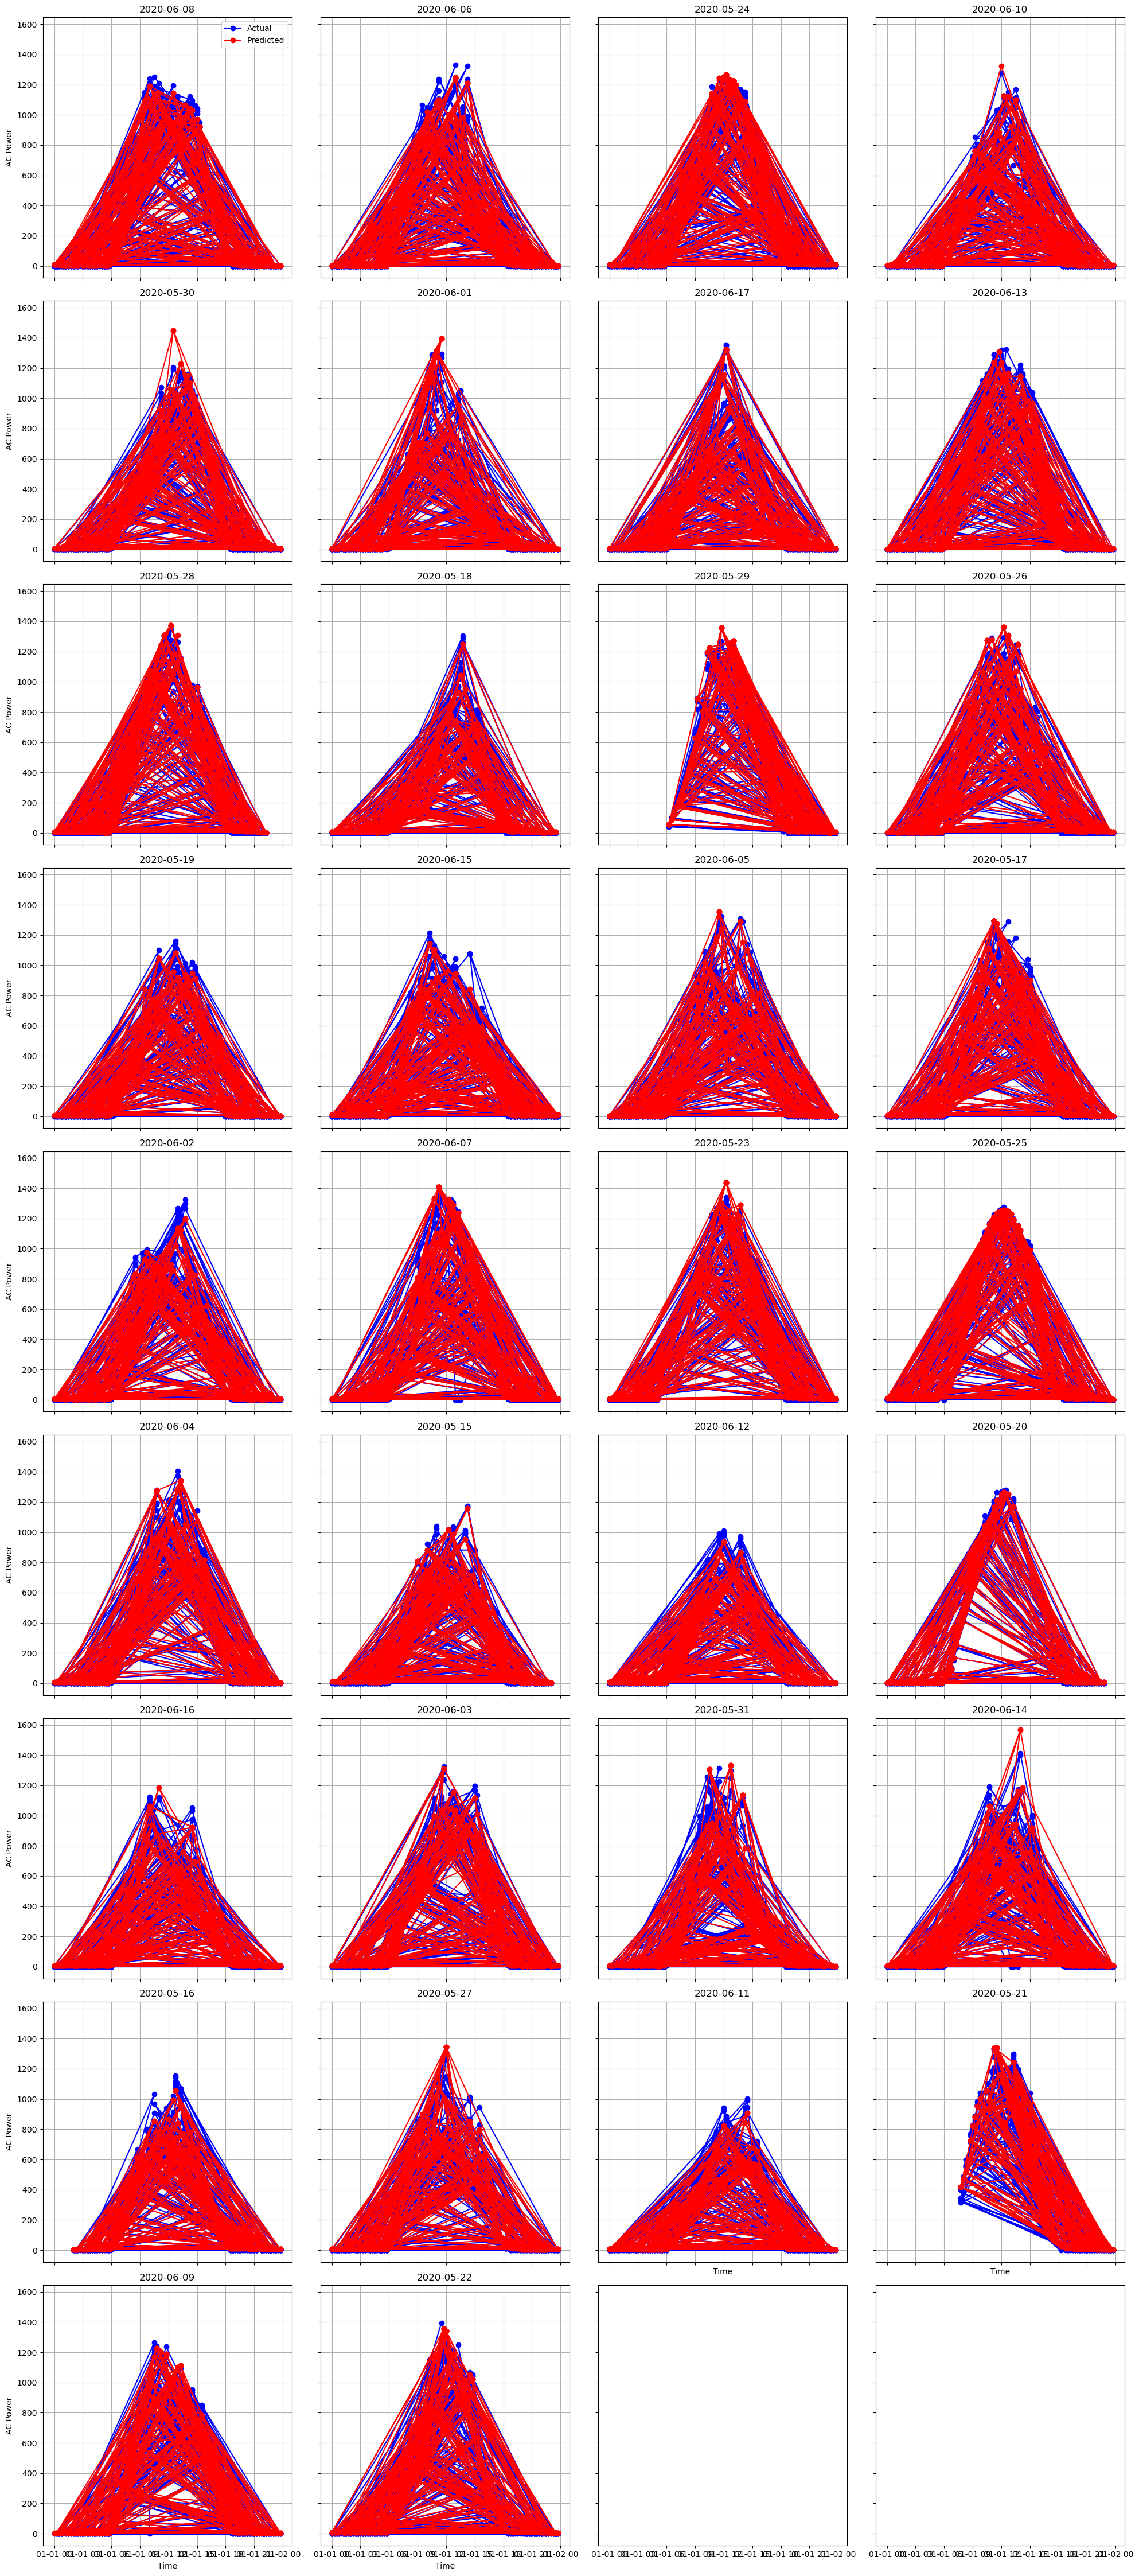

In [6]:

y_test_pred = pd.Series(y_test_pred, index=X_test.index)

unique_dates = X_test['DATE_TIME'].dt.date.unique()
num_dates = len(unique_dates)

fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(20, 45), sharex=True, sharey=True)
axes = axes.flatten()


for i, date in enumerate(unique_dates):
    date_data = X_test[X_test['DATE_TIME'].dt.date == date]
    actual_values = y_test.loc[date_data.index]
    predicted_values = y_test_pred.loc[date_data.index]
    
    date_data['TIME'] = pd.to_datetime(date_data['DATE_TIME'].dt.time.astype(str), format='%H:%M:%S')

    ax = axes[i]
    ax.plot(date_data['TIME'], actual_values, marker='o', linestyle='-', color='b', label='Actual')
    ax.plot(date_data['TIME'], predicted_values, marker='o', linestyle='-', color='r', label='Predicted')
    ax.set_title(date)
    ax.grid(True)
    

    if i % 4 == 0:
        ax.set_ylabel('AC Power')

    if i >= (num_dates - 4):
        ax.set_xlabel('Time')

    if i == 0:
        ax.legend()

plt.tight_layout()
plt.show()


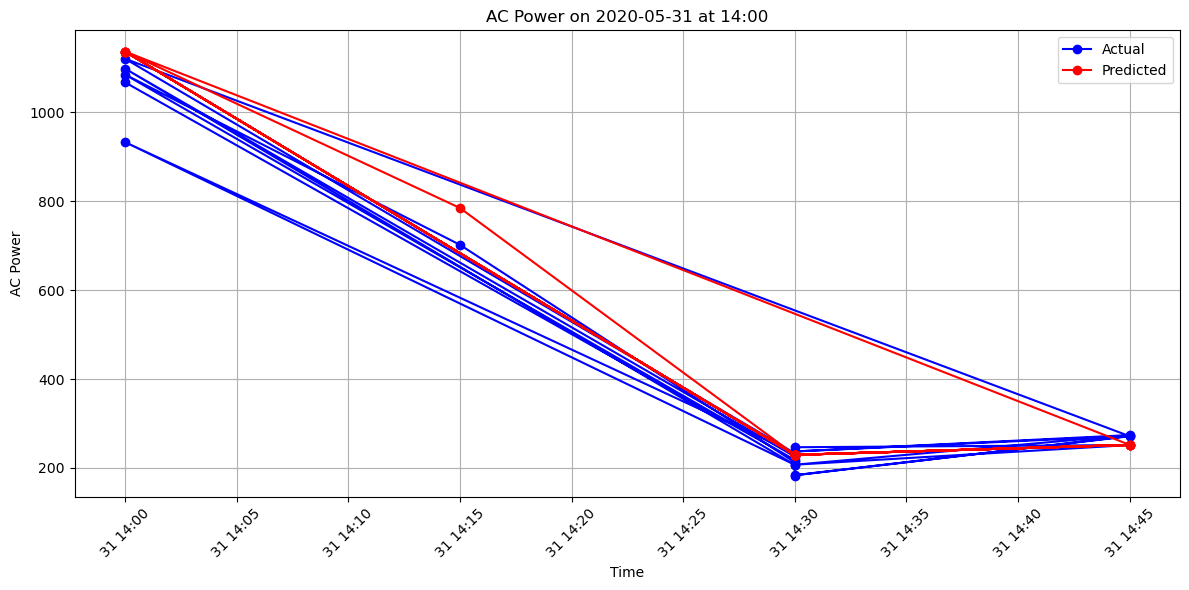

In [16]:
X_test = pd.DataFrame(X_test, columns=features, index=y_test.index)
X_test['DATE_TIME'] = plant1_data.loc[X_test.index, 'DATE_TIME']
y_test_pred = pd.Series(y_test_pred, index=X_test.index)

specific_date = pd.to_datetime('2020-05-31').date()
specific_hour = 14

hour_data = X_test[(X_test['DATE_TIME'].dt.date == specific_date) & (X_test['DATE_TIME'].dt.hour == specific_hour)]
actual_values = y_test.loc[hour_data.index]
predicted_values = y_test_pred.loc[hour_data.index]

plt.figure(figsize=(12, 6))
plt.plot(hour_data['DATE_TIME'], actual_values, marker='o', linestyle='-', color='b', label='Actual')
plt.plot(hour_data['DATE_TIME'], predicted_values, marker='o', linestyle='-', color='r', label='Predicted')
plt.title(f'AC Power on {specific_date} at {specific_hour}:00')
plt.xlabel('Time')
plt.ylabel('AC Power')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Use Ridge to prevent overfitting

In [9]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

X = plant1_data[features]
y = plant1_data[target]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


r_model = Ridge(alpha=1.0)
r_model.fit(X_train, y_train)
y_pred_r = r_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred_r)
r2 = r2_score(y_test, y_pred_r)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2 * 100:.2f}%')

Mean Squared Error: 3081.64
R² Score: 98.00%


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# 数据加载和处理
p1_generate = pd.read_csv('./data/Plant_1_Generation_Data.csv')
p1_weather = pd.read_csv('./data/Plant_1_Weather_Sensor_Data.csv')
p1_generate['DATE_TIME'] = pd.to_datetime(p1_generate['DATE_TIME'], format='mixed', dayfirst=True)
p1_weather['DATE_TIME'] = pd.to_datetime(p1_weather['DATE_TIME'], format='mixed', dayfirst=True)
plant1_data = pd.merge(p1_generate, p1_weather, on='DATE_TIME')

# 特征工程
def create_features(df):
    df['HOUR'] = df['DATE_TIME'].dt.hour
    df['MINUTE'] = df['DATE_TIME'].dt.minute
    df['TOTAL_MINUTES_PASS'] = df['MINUTE'] + df['HOUR'] * 60
    return df

plant1_data = create_features(plant1_data)

# 特征选择
features = ['HOUR', 'MINUTE', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']
target = 'AC_POWER'

X = plant1_data[features]
y = plant1_data[target]

# 特征缩放
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 数据分割
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge模型
r_model = Ridge(alpha=1.0)
r_model.fit(X_train, y_train)
y_pred_r = r_model.predict(X_test)

# 模型评估
mse = mean_squared_error(y_test, y_pred_r)
r2 = r2_score(y_test, y_pred_r)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2 * 100:.2f}%')


Mean Squared Error: 3081.64
R² Score: 98.00%


# Use Cross Validation to testify overfitting

In [11]:

cv_scores = cross_val_score(r_model, plant1_data[features], plant1_data[target], cv=5, scoring='r2')
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f'Cross-Validation R² Score: {cv_mean:.2f} ± {cv_std:.2f}')

Cross-Validation R² Score: 0.98 ± 0.01


The R^2 score value is stable with standard error is small indicates there is less potential of overfitting.

# Prediction

In [12]:
future_dates = pd.date_range(start=plant1_data['DATE_TIME'].max(), periods=48, freq='h')
future_data = pd.DataFrame(future_dates, columns=['DATE_TIME'])
future_data = create_features(future_data)
# fill previous date weather
last_weather_conditions = plant1_data[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].iloc[-1]
future_data['AMBIENT_TEMPERATURE'] = last_weather_conditions['AMBIENT_TEMPERATURE']
future_data['MODULE_TEMPERATURE'] = last_weather_conditions['MODULE_TEMPERATURE']
future_data['IRRADIATION'] = last_weather_conditions['IRRADIATION']

prev_day_ac_power = plant1_data['AC_POWER'].iloc[-24:].values
future_data['PREV_DAY_AC_POWER'] = [0]*24 + list(prev_day_ac_power)
future_predictions = lr.predict(future_data[features])
future_data['PREDICTED_AC_POWER'] = future_predictions
print(future_data[['DATE_TIME', 'PREDICTED_AC_POWER']])

             DATE_TIME  PREDICTED_AC_POWER
0  2020-06-17 23:45:00            4.365098
1  2020-06-18 00:45:00            6.224430
2  2020-06-18 01:45:00            6.143590
3  2020-06-18 02:45:00            6.062749
4  2020-06-18 03:45:00            5.981909
5  2020-06-18 04:45:00            5.901068
6  2020-06-18 05:45:00            5.820228
7  2020-06-18 06:45:00            5.739387
8  2020-06-18 07:45:00            5.658547
9  2020-06-18 08:45:00            5.577706
10 2020-06-18 09:45:00            5.496866
11 2020-06-18 10:45:00            5.416025
12 2020-06-18 11:45:00            5.335185
13 2020-06-18 12:45:00            5.254344
14 2020-06-18 13:45:00            5.173504
15 2020-06-18 14:45:00            5.092663
16 2020-06-18 15:45:00            5.011822
17 2020-06-18 16:45:00            4.930982
18 2020-06-18 17:45:00            4.850141
19 2020-06-18 18:45:00            4.769301
20 2020-06-18 19:45:00            4.688460
21 2020-06-18 20:45:00            4.607620
22 2020-06-